In [2]:
!pip install yfinance
!pip install beautifulsoup4
!pip install requests
!pip install matplotlib
!pip install pandas



In [3]:
import yfinance as yf
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
# Download Tesla stock data
tesla = yf.Ticker("TSLA")

# Extract historical data for Tesla stock
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [11]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website containing Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table containing the revenue data
revenue_table = soup.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if revenue_table:
    # Extract rows from the table
    rows = revenue_table.find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if len(cols) == 2:  # Ensure only rows with date and revenue are included
            data.append(cols)

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

    # Clean the DataFrame (e.g., removing '$' and ',' from Revenue)
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    tesla_revenue.dropna(inplace=True)

    # Display the last five rows of the DataFrame
    print(tesla_revenue.tail())
else:
    print("Revenue table not found on the webpage.")


Revenue table not found on the webpage.


In [12]:
# Import yfinance library
import yfinance as yf

# Download GameStop stock data
gme = yf.Ticker("GME")

# Extract historical data for GameStop stock
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website containing GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table containing the revenue data
revenue_table = soup.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if revenue_table:
    # Extract rows from the table
    rows = revenue_table.find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if len(cols) == 2:  # Ensure only rows with date and revenue are included
            data.append(cols)

    # Create a DataFrame
    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

    # Clean the DataFrame (e.g., removing '$' and ',' from Revenue)
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    gme_revenue.dropna(inplace=True)

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())
else:
    print("Revenue table not found on the webpage.")


Revenue table not found on the webpage.


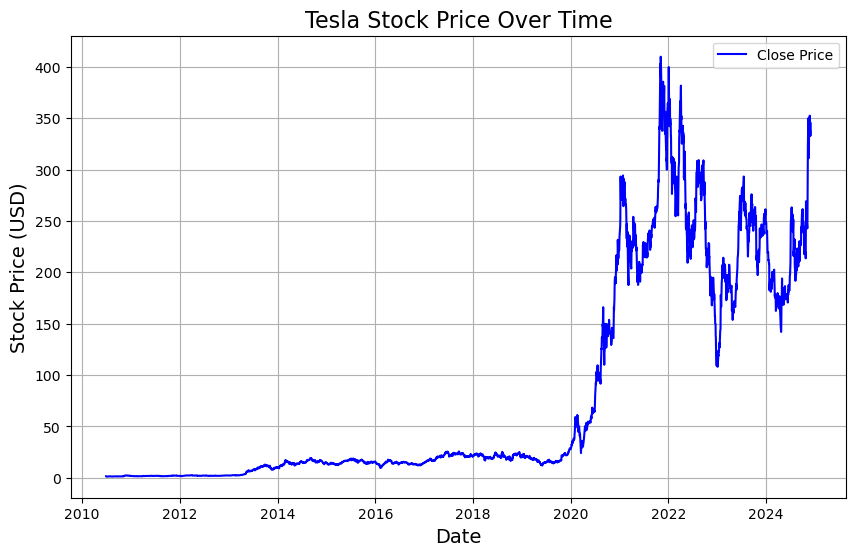

In [14]:
# Import libraries
import matplotlib.pyplot as plt

# Function to create and plot the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


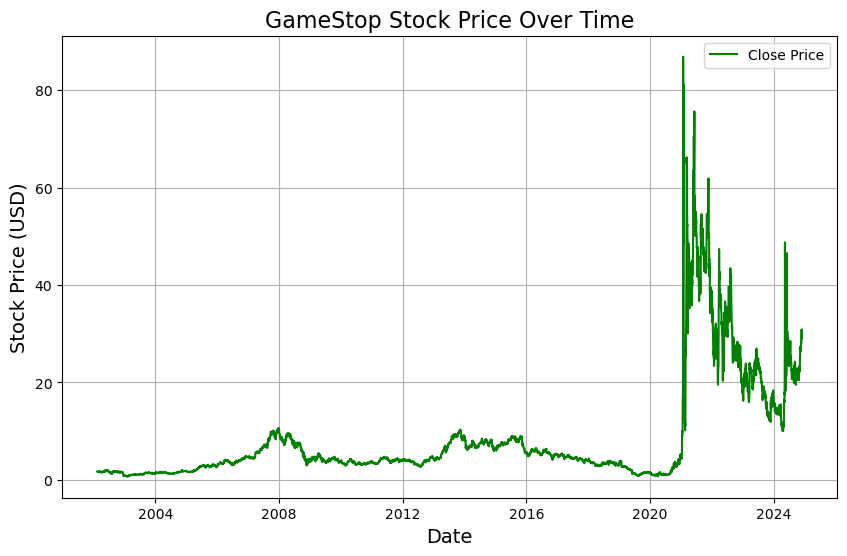

In [15]:
# Function to create and plot the graph (same as in Question 5)
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
